iter : 8500 ,max : 14.854942271457475
|x     |u
-------------------
|0.0 | 85.0                
|0.0 | 5.649420595776182   
|0.1 | 1.2571159645060204  
|0.1 | -0.6271510752320749 
|0.1 | -1.2537935472518638 
|0.2 | -1.3301243405765921 
|0.2 | -1.2283757874830084 
|0.2 | -1.0771718738612313 
|0.3 | -0.9171815302826414 
|0.3 | -0.7621235875161376 
|0.3 | -0.6178881995008738 
|0.4 | -0.4880678547317457 
|0.4 | -0.3752997870264508 
|0.4 | -0.2812572739385654 
|0.5 | -0.20627128371035844
|0.5 | -0.14911186608434898
|0.5 | -0.10721958994250229
|0.6 | -0.07733825092690907
|0.6 | -0.056235284532015435
|0.6 | -0.04120637623990427
|0.7 | -0.03026292447206751
|0.7 | -0.022079415897864406
|0.7 | -0.015832221197238993
|0.8 | -0.011028153262750796
|0.8 | -0.007368057451371828
|0.8 | -0.004653832728380233
|0.9 | -0.0027311884920156212
|0.9 | -0.001457315241352636
|0.9 | -0.0006846876004090985
|1.0 | -0.00025508082911689616
|1.0 | 0                   


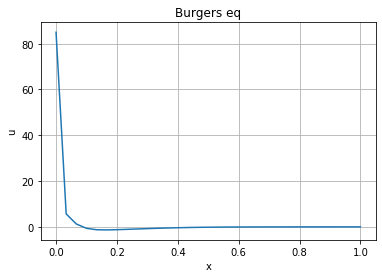

In [6]:
from math import *
import matplotlib.pyplot as plt

N = 31
Re = 25
dx = 1.0 / (N - 1)
dt = 0.01
eps = 0.00001
maximum = 1
u = []
un = []
A = []
B = []
C = []
D = []
alfa = []
betta = []

for i in range(N): # 0:N-1
    u.append(0)
    un.append(0)
    alfa.append(0)
    betta.append(0)
    A.append(0)
    B.append(0)
    C.append(0)
    D.append(0)
    
it = 0    

while maximum > eps and it < 8500:
    
    it += 1   
    
    for i in range(N) :       # 0:N-1
        A[i] = u[i] / dx - 1.0 / (Re * dx * dx)
        B[i] = 1.0 / dt - u[i] / dx  + 2.0 / (Re * dx * dx)
        C[i] = -1.0 / (Re * dx * dx)
        D[i] = u[i] / dt
     
    alfa[1] = 0.0
    
#     betta[1] = 1.0

    betta[1] = it * dt
    
    for i in range(1,N-1) :# 1:N-2
        alfa[i + 1] = -A[i] / (B[i] + C[i] * alfa[i])
        betta[i + 1] = (D[i] - C[i] * betta[i]) / (B[i] + C[i] * alfa[i])

    u[N - 1] = betta[N - 1] / (1 - alfa[N - 1])
#     un[N - 1] = 0.0

    for i in range(N - 2,-1,-1) : # N - 2 : 0
        un[i] = alfa[i + 1] * un[i + 1] + betta[i + 1]

    maximum = 0
    for i in range(N) :
        if maximum < fabs(un[i] - u[i]) :
            maximum = fabs(un[i] - u[i])
    for i in range(N) :
        u[i] = un[i]
    

print('iter :', it, ',max :', maximum)    
print('|x     |u')
print('-------------------')

for i in range(N):
    print("|{: <3.1f} | {: <20}".format(i * dx, un[i]))

x = [i * dx for i in range(N)]
plt.plot(x, un)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Burgers eq')
plt.show()

# un